# Analiza objaśniająca i storytelling
## Autor: Mateusz Jagoda


## Opis problemu i cel 

W niniejszym zeszycie przeprowadzono kompletną analizę zbioru danych.

## Przegląd danych i przygotowanie do analizy


W ramach projektu dokonano analizy zbioru danych "StudentsPerformance". Zbiór ten opisano, po czym sporządzono 4 rodzaje wykresów wraz z komentarzami oraz podsumowanie analizy.

In [152]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.mode.chained_assignment = None
df = pd.read_csv('StudentsPerformance.csv',encoding = "UTF-8", header=0)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Zbiór ten składa się z 8 kolumn, o następującym znaczeniu:
- gender - płeć
- race/ethnicity - rasa/przynależność do grupy etnicznej
- parental level of education - poziom edukacji rodziców
- lunch - jaki rodzaj obiadu uczeń jadł w szkole (standardowy/okrojony)
- test preparation course - czy uczeń ukończył kurs przygotowujący
- math score - wynik z części z matematyki
- reading score - wynik z części z czytania
- writing score - wynik z części z pisania

Kolumny te mają następujące typy. W żadnej z nich nie występują brakujące wartości.


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


W kolumnach "gender", "race/ethnicity", "parental level of education", "lunch" i "test preparation course" występuje niewiele różnych wartości, dzięki czemu można je wszystkie wypisać.

In [154]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [155]:
def printColumnUniqueValues(columnName):
    print(df[columnName].value_counts())
    print("\n")

printColumnUniqueValues('gender')
printColumnUniqueValues('race/ethnicity')
printColumnUniqueValues('parental level of education')
printColumnUniqueValues('lunch')
printColumnUniqueValues('test preparation course')

female    518
male      482
Name: gender, dtype: int64


group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


standard        645
free/reduced    355
Name: lunch, dtype: int64


none         642
completed    358
Name: test preparation course, dtype: int64




Dane można uznać więc za kompletne i niewymagające czyszczenia. W celu ułatwienia dalszej analizy dodano kolumnę "average score", będącą średnią pozostałych trzech wyników.

In [156]:
df['average score']= df.mean(numeric_only=True, axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


Dla kolumn o wartościach numerycznych przedstawiono statystykę podsumowującą

In [157]:
df.describe()

,math score,reading score,writing score,average score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


## Analiza danych

Analizę danych rozpoczęto od stworzenia macierzy korelacji

In [158]:
df.corr()

,math score,reading score,writing score,average score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average score,0.918746,0.970331,0.965667,1.000000


Wyniki z poszczególnych testów są ze sobą mocno powiązane - można więc wysnuć wniosek, że zwykle uczeń jest albo we wszystkim dość dobry albo we wszystkim kiepski.
 
Na wykresach przedstawiono rozkład wyników z poszczególnych przedmiotów.

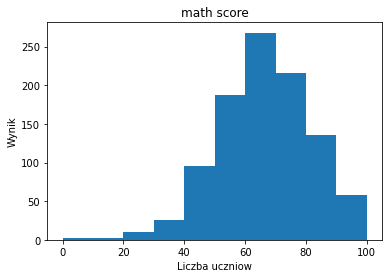

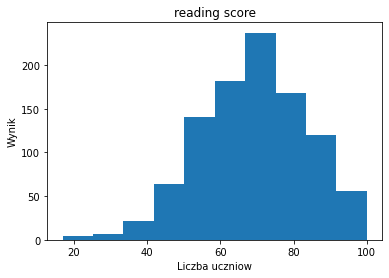

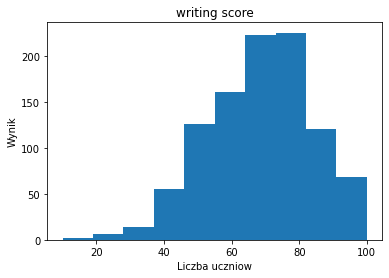

In [159]:
def printSubjectHistogram(columnName):
    plt.hist(df[columnName])
    plt.xlabel('Liczba uczniow')
    plt.ylabel('Wynik')
    plt.title(columnName)
    plt.show()

printSubjectHistogram('math score')
printSubjectHistogram('reading score')
printSubjectHistogram('writing score')



Wyniki ze wszystkich przedmiotów mają rozkład zbliżony do normalnego. Najlepsze wyniki uczniowie otrzymali z testu z pisania, w którym najbardziej liczna grupą okazała się grupa o wynikach pomiędzy 70 i 80.

 
Następnie przedstawiono zależność wyników testów od rodzaju obiadu spożywanego w szkole, rasy i płci.

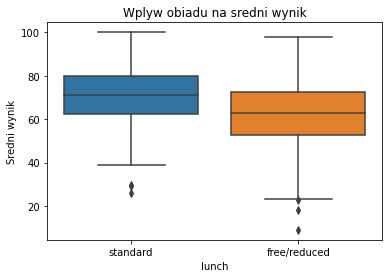

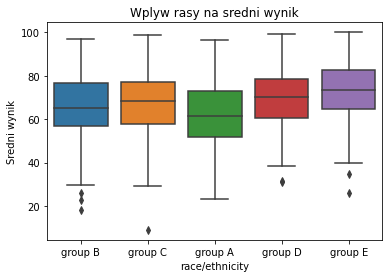

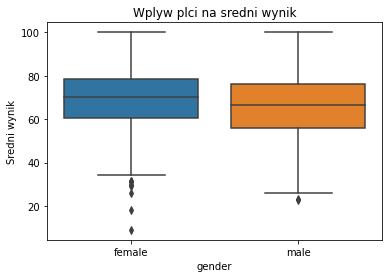

In [160]:
sns.boxplot(data = df, x = "lunch", y = "average score")
plt.ylabel("Sredni wynik")
plt.title("Wplyw obiadu na sredni wynik")
plt.show()
sns.boxplot(data = df, x = "race/ethnicity", y = "average score")
plt.ylabel("Sredni wynik")
plt.title("Wplyw rasy na sredni wynik")
plt.show()
sns.boxplot(data = df, x = "gender", y = "average score")
plt.ylabel("Sredni wynik")
plt.title("Wplyw plci na sredni wynik")
plt.show()

Wykresy ukazują, że dzieci, które jadły w szkole pełny obiad miały dużo większe szanse na osiągnięcie dobrych wyników. W przypadku ras, grupa A uzyskuje najlepsze wyniki, a grupa E najsłabsze. Dziewczynki zdobywały średnio lepsze wyniki niż chłopcy.

Następnie przedstawiono jak prezentowały się wyniki w czytaniu i pisaniu zależnie od wykształcenia rodziców.

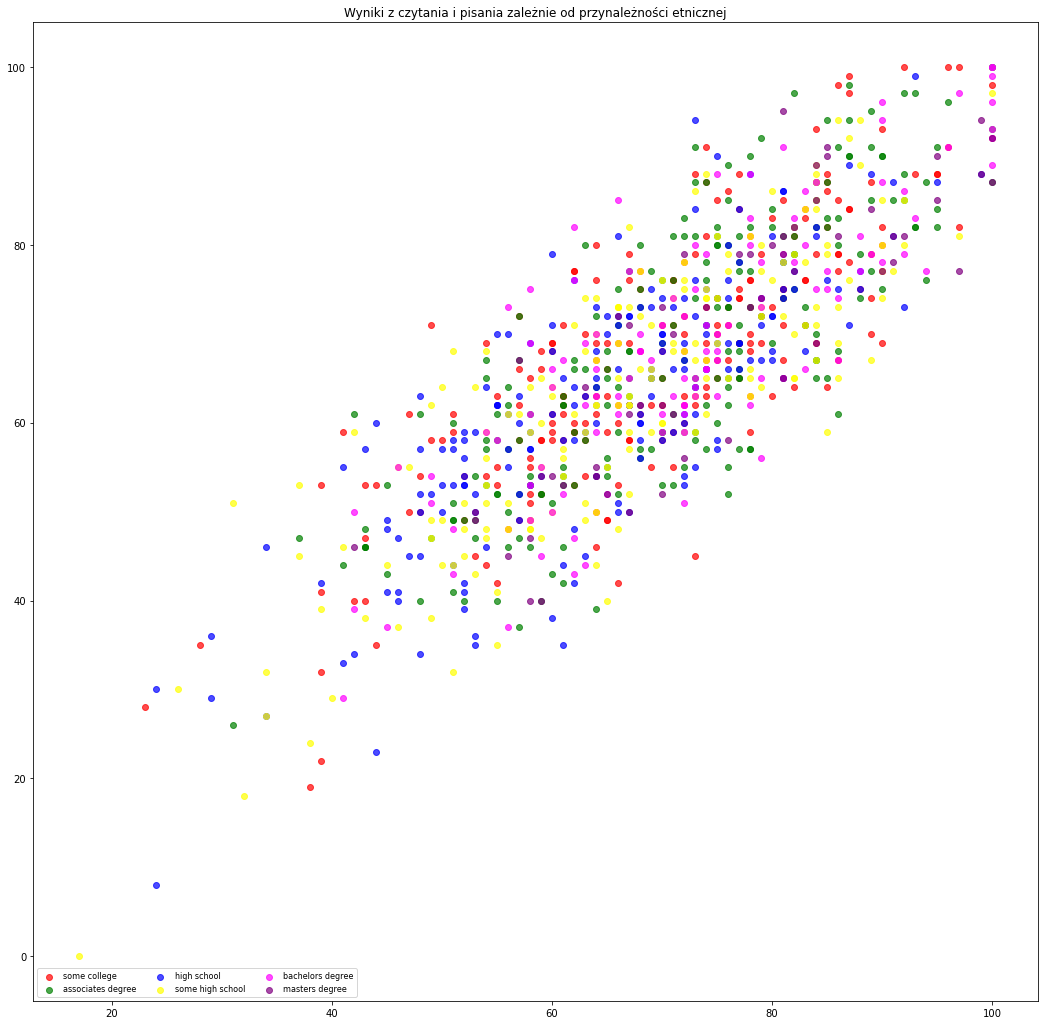

In [161]:
somecol = df[df["parental level of education"]  == "some college"]
associate = df[df["parental level of education"]  == "associate's degree"]
highschool = df[df["parental level of education"]  == "high school"]
somehighschool = df[df["parental level of education"]  == "some high school"]
bachelor = df[df["parental level of education"]  == "bachelor's degree"]
master = df[df["parental level of education"]  == "master's degree"]

plt.figure(figsize=(18, 18))

sc=plt.scatter(somecol['reading score'],somecol['math score'],color='red', alpha=0.7)
ass=plt.scatter(associate['reading score'],associate['math score'],color='green', alpha=0.7)
hi=plt.scatter(highschool['reading score'],highschool['math score'],color='blue', alpha=0.7)
sh=plt.scatter(somehighschool['reading score'],somehighschool['math score'],color='yellow', alpha=0.7)
ba=plt.scatter(bachelor['reading score'],bachelor['math score'],color='magenta', alpha=0.7)
ma=plt.scatter(master['reading score'],master['math score'],color='purple', alpha=0.7)

plt.legend((sc, ass, hi, sh, ba, ma),
           ('some college', 'associates degree', 'high school', 'some high school', 'bachelors degree', 'masters degree'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.title("Wyniki z czytania i pisania zależnie od przynależności etnicznej")
plt.show()


Z wykresu wyczytać można, że dzieci rodziców, którzy ukończyli studia, bądź chociaż studiowali przez pewien czas, osiągały lepsze wyniki niż dzieci rodziców o słabszej edukacji.

Ostatni krok analizy polegał na przygotowaniu wykresów ukazujących związek przystąpienia do kursu przygotowującego, rodzaju obiadu jedzonego w szkole i przynależności etnicznej.

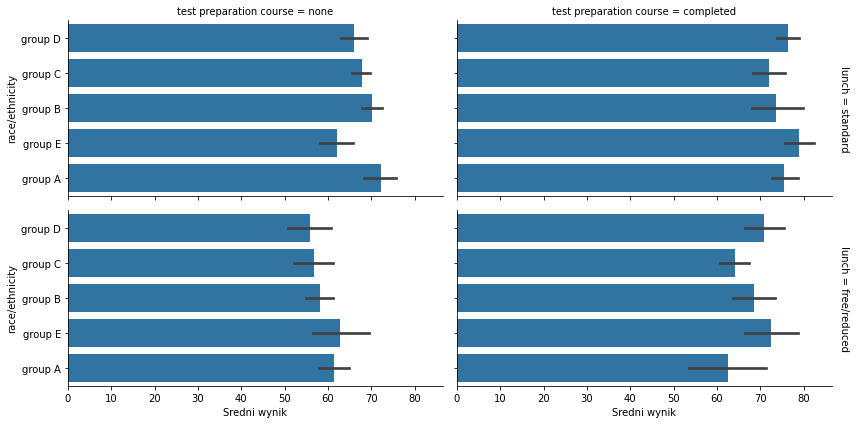

In [162]:
g = sns.FacetGrid(data = df, row="lunch", col = "test preparation course", height = 3,aspect=2,  margin_titles=True);
g.map(sns.barplot, "average score", "race/ethnicity");
g.set_axis_labels("Sredni wynik");

Z wykresów wyczytać można, że niezależnie od przynależności etnicznej, zdecydowanie najlepiej radziły sobie w testach dzieci, które przystąpiły do kursu przygotowawczego i jadły pełne obiady. Spośród tych dwóch parametrów to kurs przygotowawczy mocniej poprawiał wyniki uczniów.

## Podsumowanie
 
 
Zjawiska zaobserwowane w ramach zbioru "StudentsPerformance" są następujące:
- Wyniki ze wszystkich testów miały podobny rozkład, największa grupa uczniów osiągnęła wyniki z przedziału 60-80
- Niektóre grupy etniczne radzą sobie lepiej niż inne
- Dziewczynki osiągają średnio lepsze wyniki niż chłopcy
- Dzieci lepiej wyedukowanych rodziców osiągały lepsze wyniki

Dalej idącą hipotezą, jaką można by wysnuć z analizy, jest powiązanie zamożności z wynikami egzaminów - najprawdopodobniej to właśnie ludzie zamożni są wyedukowani, mają możliwość wysłania dziecka na kurs lub zagwarantowania lepszego wyżywienia. Hipotezę tę można by potwierdzić lub wykluczyć mając na przykład dane przedstawiające zamożność w każdej z grup etnicznych.